# Predicción del éxito de cirugía de Cifosis con Machine Learning

La cifosis es una curvatura excesiva de la columna vertebral, principalmente en la región torácica, que puede provocar dolor, rigidez y limitaciones funcionales en los pacientes. En los casos más severos, la intervención quirúrgica es una opción terapéutica, aunque **no siempre garantiza el éxito**.

El objetivo de este proyecto es **predecir el resultado de una cirugía de cifosis** utilizando técnicas de *Machine Learning*, a partir de variables clínicas básicas como la edad del paciente, el número de vértebras involucradas y el punto de inicio de la intervención quirúrgica.

El problema se plantea como un **problema de clasificación binaria**, donde:
- `Kyphosis = absent` indica un resultado exitoso de la cirugía.
- `Kyphosis = present` indica un resultado no exitoso.

Se utilizará el dataset `kyphosis.csv`, ampliamente empleado con fines educativos y de investigación, para explorar, entrenar y evaluar distintos modelos predictivos, poniendo especial énfasis en la **interpretabilidad de los resultados**, un aspecto clave en el ámbito sanitario.


In [ ]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("/content/kyphosis.csv")

# Mostrar las primeras filas
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
# Comprobar valores nulos por columna
df.isnull().sum()


,0
Kyphosis,0
Age,0
Number,0
Start,0


In [ ]:
# Número de filas duplicadas
df.duplicated().sum()


np.int64(0)

In [ ]:
df[df.duplicated()]


,Kyphosis,Age,Number,Start


In [ ]:
# Estadísticos básicos de la edad
df["Age"].describe()


,Age
count,81.000000
mean,83.654321
std,58.104251
min,1.000000
25%,26.000000
50%,87.000000
75%,130.000000
max,206.000000


In [ ]:
# Edad más repetida (moda)
df["Age"].mode()


,Age
0,1


In [ ]:
# Resumen estadístico de todas las variables numéricas
df.describe()


,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [ ]:
# Distribución de éxito / fracaso quirúrgico
df["Kyphosis"].value_counts()


,count
Kyphosis,
absent,64
present,17


Tengo un desbalanceo de datos

In [ ]:
# Convertir la columna 'Age' de meses a años
df['Age_Years'] = df['Age'] / 12

# Mostrar las primeras filas con la nueva columna
display(df.head())

,Kyphosis,Age,Number,Start,Age_Years
0,absent,71,3,5,5.916667
1,absent,158,3,14,13.166667
2,present,128,4,5,10.666667
3,absent,2,5,1,0.166667
4,absent,1,4,15,0.083333


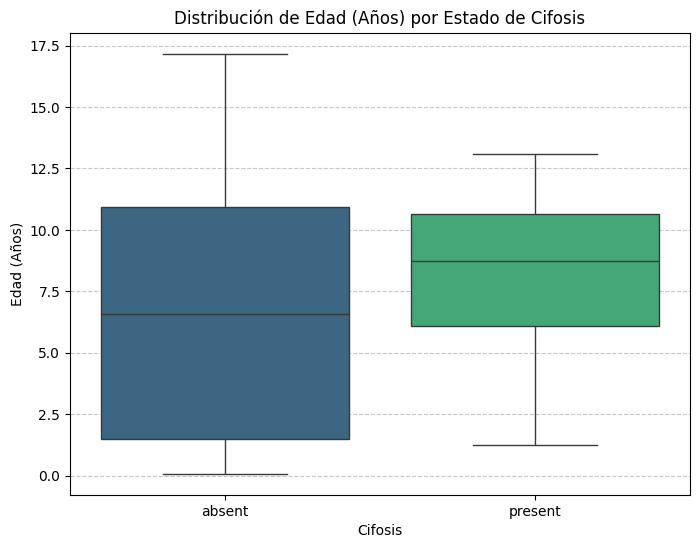

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='Kyphosis', y='Age_Years', data=df, palette='viridis', hue='Kyphosis', legend=False)
plt.title('Distribución de Edad (Años) por Estado de Cifosis')
plt.xlabel('Cifosis')
plt.ylabel('Edad (Años)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

No se detectan valores nulos ni registros duplicados en el dataset.  
Las variables presentan rangos coherentes con el contexto clínico.  
La variable objetivo muestra un cierto desbalanceo entre clases, lo que se tendrá en cuenta en la fase de modelado.


In [ ]:
import pandas as pd

# Cargar el dataset (añadido para resolver NameError si df no está definido)
df = pd.read_csv("/content/kyphosis.csv")

num_cols = ["Age", "Number", "Start"]
df.groupby("Kyphosis")[num_cols].mean()

,Age,Number,Start
Kyphosis,,,
absent,79.890625,3.750000,12.609375
present,97.823529,5.176471,7.294118


## Machine Leaning
### Árbol de decisión para clasificar la Cifosis

In [ ]:
y = df["Kyphosis"]
X = df.drop("Kyphosis", axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
model = DecisionTreeClassifier()

# Entrenar
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[18  2]
 [ 3  2]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
# Aplicar SMOTE solo en el conjunto de train
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [ ]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))



Counter({'absent': 44, 'present': 12})
Counter({'absent': 44, 'present': 44})


In [ ]:
model_sm = DecisionTreeClassifier(max_depth=3)
model_sm.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred_sm = model_sm.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred_sm))

[[18  2]
 [ 1  4]]


In [ ]:
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

      absent       0.95      0.90      0.92        20
     present       0.67      0.80      0.73         5

    accuracy                           0.88        25
   macro avg       0.81      0.85      0.83        25
weighted avg       0.89      0.88      0.88        25



## ROC Curve

In [ ]:
from sklearn.metrics import(roc_curve, roc_auc_score)
y_prob = model_sm.predict_proba(X_test)[:, 1]
#AUC
auc = roc_auc_score(y_test, y_prob)
auc

np.float64(0.8500000000000001)

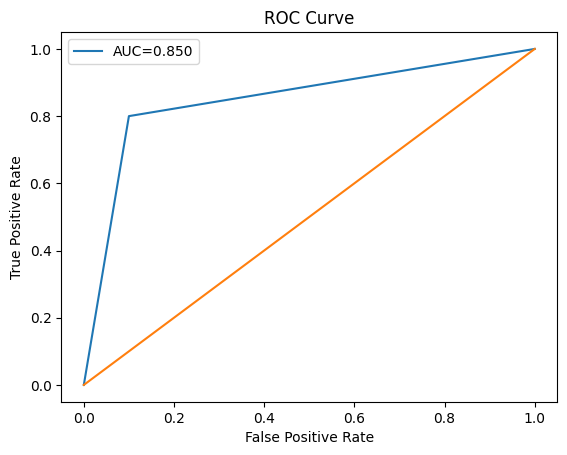

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label="present")
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0, 1], [0, 1])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

## Regresión Logística

Escalado de las variables: estandarización

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Lo puede hacer con el smout
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Training
model_lg= LogisticRegression()
model_lg.fit(X_train_scaled, y_train)



LogisticRegression()

In [ ]:
# Testing
y_pred_lg = model_lg.predict(X_test_scaled)


In [ ]:
# Métricas
print(confusion_matrix(y_test, y_pred_lg))

[[20  0]
 [ 3  2]]


In [ ]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

      absent       0.87      1.00      0.93        20
     present       1.00      0.40      0.57         5

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25



imprimir curva ROC

In [ ]:
import numpy as np
coef = pd.Series(model_lg.coef_[0], index=X.columns).sort_values(key=np.abs, ascending=False)
coef


,0
Start,-0.856163
Age,0.411975
Number,0.314778
